<a href="https://colab.research.google.com/github/Voyageran/StartNN/blob/main/pytorch_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [289]:
import sys
from google.colab import drive
drive.mount('/content/gdrive')
sys.path.insert(0,"/content/content/notebooks/colabInstallPackage")

!cp -av '/content/gdrive/MyDrive/Colab Notebooks/d2l' '/content/'

Mounted at /content/gdrive
'/content/gdrive/MyDrive/Colab Notebooks/d2l/paddle.py' -> '/content/d2l/paddle.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/mxnet.py' -> '/content/d2l/mxnet.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/tensorflow.py' -> '/content/d2l/tensorflow.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/torch.py' -> '/content/d2l/torch.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__init__.py' -> '/content/d2l/__init__.py'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__pycache__/mxnet.cpython-310.pyc' -> '/content/d2l/__pycache__/mxnet.cpython-310.pyc'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__pycache__/__init__.cpython-310.pyc' -> '/content/d2l/__pycache__/__init__.cpython-310.pyc'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__pycache__/torch.cpython-310.pyc' -> '/content/d2l/__pycache__/torch.cpython-310.pyc'
'/content/gdrive/MyDrive/Colab Notebooks/d2l/__pycache__/tensorflow.cpython-310.pyc' -> '/content/d2l/__pycache__/tensorflow.cpython-310.pyc'
'

In [290]:
!python --version

Python 3.10.12


In [291]:
# !sudo apt install python3.8

主要参考教材：李沐《动手学深度学习》

- Matplotlib examples: https://matplotlib.org/stable/gallery/index.html

- Matplot functions: https://matplotlib.org/stable/api/matplotlib_configuration_api.html

- Pytorch document: https://pytorch.org/docs/stable/nn.html

In [292]:
help(torch.ones) #查找特定函数和类的用法

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

# **Basic knowledges**

## 数组类型

无论使用哪个深度学习框架，它的张量类（在MXNet中为ndarray， 在PyTorch和TensorFlow中为Tensor）都与Numpy的ndarray类似。

但深度学习框架又比Numpy的ndarray多一些重要功能： 首先，GPU很好地支持加速计算，而NumPy仅支持CPU计算； 其次，张量类支持自动微分。 这些功能使得张量类更适合深度学习。

In [293]:
import torch

In [294]:
# Row vector  12*1 or (12,)
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [295]:
x.shape

torch.Size([12])

In [296]:
len(x)

12

In [297]:
# Total number of elements
# For x, 12*1*1 = 12
x.numel()

12

In [298]:
y = torch.ones((3,3,2))
y.numel()

18

In [299]:
# Reshap
X = x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [300]:
# Row vector to column vector
# Note that torch.transpose() doesn't work on the 1-D array
# For 2D array, torch.t(A) == torch.transpose(A,0,1)
z = torch.arange(12)
z.reshape(12,1)

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11]])

In [301]:
# All 0/ 1 / random
torch.zeros( (2,3,4) )

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [302]:
torch.ones( (2,3,4) )

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [303]:
torch.randn((2,3,4))

tensor([[[-0.6639,  0.2067, -0.3326, -0.3973],
         [ 0.1429, -0.8593,  0.5067,  2.2967],
         [ 0.0274,  1.9157, -1.1023, -0.0690]],

        [[ 0.1155, -0.3614,  0.5982, -0.2180],
         [-0.5054,  0.8581,  1.0254,  0.7416],
         [ 0.7202,  0.7448,  0.7921, -0.7384]]])

我们还可以通过提供包含数值的Python列表（或嵌套列表），来为所需张量中的每个元素赋予确定值。 在这里，最外层的列表对应于轴0，内层的列表对应于轴1。

In [304]:
# 自定义
p = torch.tensor([[2,1,4,3], [1,2,3,4], [4,3,2,1]])
p

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [305]:
p.shape

torch.Size([3, 4])

In [306]:
q = torch.tensor( [
                 [[2,1,4,3], [1,2,3,4], [4,3,2,1]],
                 [[2,1,4,3], [1,2,3,4], [4,3,2,1]]
                  ] )
q.shape
#总之，()里面必须是列表，不能裸露把列表放进去

torch.Size([2, 3, 4])

## 运算符

对于任意具有相同形状的张量， 常见的标准算术运算符（+、-、\*、/和**）都可以被升级为按元素运算。

In [307]:
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
x+y, x-y, x*y, x/y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [308]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

我们也可以把多个张量连结（concatenate）在一起， 把它们端对端地叠起来形成一个更大的张量。 我们只需要提供张量列表，并给出沿哪个轴连结。 下面的例子分别演示了当我们沿行（轴-0，形状的第一个元素） 和按列（轴-1，形状的第二个元素）连结两个矩阵时，会发生什么情况。

第一个输出的tensor： 张量轴-0 长度 3+3 = 6；第二个输出的tensor： 张量轴-1 长度 4+4 = 8

In [309]:
X = torch.arange(12, dtype = torch.float32).reshape((3,4))
Y = torch.tensor([ [2.0,1,4,3], [1,2,3,4], [4,3,2,1] ])
torch.cat((X,Y), dim=0), torch.cat( (X,Y), dim = 1 )

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [310]:
# test whether the elements in a specific position in X and Y are the same value
X == Y, X > Y, X < Y

(tensor([[False,  True, False,  True],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[False, False, False, False],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]),
 tensor([[ True, False,  True, False],
         [False, False, False, False],
         [False, False, False, False]]))

In [311]:
# The sum of all the elements in a tensor
X.sum()

tensor(66.)

In [312]:
K = torch.ones([3,3,2])
K.sum()

tensor(18.)

## **广播机制(broadcasting mechanism)**

在上面的部分中，我们看到了如何在相同形状的两个张量上执行按元素操作。 在某些情况下，即使形状不同，我们仍然可以通过调用 广播机制（broadcasting mechanism）来执行按元素操作。 这种机制的工作方式如下：

1.   通过适当复制元素来扩展一个或两个数组，以便在转换之后，两个张量具有相同的形状；
2.   对生成的数组执行按元素操作。

在大多数情况下，我们将沿着数组中长度为1的轴进行广播，如下例子：

In [313]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [314]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## **张量算法的基本性质**

### **Dimension Reduction**

In [315]:
x = torch.arange(4, dtype = torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [316]:
A = torch.arange(20, dtype = torch.float32).reshape(5,4)
A, A.shape, A.sum() #sum all the elements

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 torch.Size([5, 4]),
 tensor(190.))

In [317]:
# sum all rows [5,4] -> [1,4]
A_sum_axis0 = A.sum(axis = 0)
A_sum_axis0, A

(tensor([40., 45., 50., 55.]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

In [318]:
A, A.sum(axis=[0,1])

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor(190.))

In [319]:
# sum all columns [5,4] -> [5,1]
A_sum_axis1 = A.sum(axis = 1)
A_sum_axis1, A

(tensor([ 6., 22., 38., 54., 70.]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

In [320]:
A.mean(), A.sum() / A.numel(), A.shape

(tensor(9.5000), tensor(9.5000), torch.Size([5, 4]))

In [321]:
# A - 5*4
A.mean(axis=0), A.sum(axis=0) / A.shape[0], A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]), 5)

### **非降维求和**

有时在调用函数来计算总和或均值时保持轴数不变会很有用。

In [322]:
sum_A = A.sum(axis = 1, keepdims = True)
A, A.shape, sum_A, sum_A.shape, A.sum(axis = 1), A.sum(axis = 1).shape

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 torch.Size([5, 4]),
 tensor([[ 6.],
         [22.],
         [38.],
         [54.],
         [70.]]),
 torch.Size([5, 1]),
 tensor([ 6., 22., 38., 54., 70.]),
 torch.Size([5]))

In [323]:
# 广播
A / sum(A)

tensor([[0.0000, 0.0222, 0.0400, 0.0545],
        [0.1000, 0.1111, 0.1200, 0.1273],
        [0.2000, 0.2000, 0.2000, 0.2000],
        [0.3000, 0.2889, 0.2800, 0.2727],
        [0.4000, 0.3778, 0.3600, 0.3455]])

如果我们想沿某个轴计算A元素的累积总和， 比如axis=0（按行计算），可以调用cumsum函数。 此函数不会沿任何轴降低输入张量的维度。

## **索引和切片**

与任何Python数组一样：第一个元素的索引是0，最后一个元素索引是-1。

e.g., [m:n] == (m+1):n

从0开始数，包括头，但是不包括尾

我们可以用[-1]选择最后一个元素，可以用[1:3]选择第二个和第三个元素

In [324]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [325]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [326]:
# Write elements by index
X[1,2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

如果我们想为多个元素赋值相同的值，我们只需要索引所有元素，然后为它们赋值。

In [327]:
X[0:2, :]=12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## **节省内存**

运行一些操作可能会导致为新结果分配内存。 例如，如果我们用Y = X + Y，我们将取消引用Y指向的张量，而是指向新分配的内存处的张量。

在下面的例子中，我们用Python的id()函数演示了这一点， 它给我们提供了内存中引用对象的确切地址。 运行Y = Y + X后，我们会发现id(Y)指向另一个位置。 这是因为Python首先计算Y + X，为结果分配新的内存，然后使Y指向内存中的这个新位置。

In [328]:
before = id(Y)
Y = Y + X
# id(Y) == before
before, id(Y), id(Y) == before

(139847668251632, 139847668241312, False)

这可能是不可取的，原因有两个：



1.   首先，我们不想总是不必要地分配内存。在机器学习中，我们可能有数百兆的参数，并且在一秒内多次更新所有参数。通常情况下，我们希望原地执行这些更新；
2.   如果我们不原地更新，其他引用仍然会指向旧的内存位置，这样我们的某些代码可能会无意中引用旧的参数

我们可以使用切片表示法将操作的结果分配给先前分配的数组，例如$Y[:] = <expression>$。 为了说明这一点，我们首先创建一个新的矩阵Z，其形状与另一个Y相同， 使用zeros_like来分配一个全0的块。

In [329]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 139847668270160
id(Z): 139847668270160


In [330]:
before = id(X)
X += Y
id(X) == before

True

## **转换为其他Python对象**

将深度学习框架定义的张量与NumPy张量（ndarray）互相转化。

torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量。

In [331]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [332]:
# 将大小为1的张量转换为Python标量
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## **Data Preprocessing**

### **Read datasets**

创建一个人工数据集，并存储在CSV（逗号分隔值）文件 ../data/house_tiny.csv中。

In [333]:
import os

os.makedirs(os.path.join('..','data'), exist_ok = True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms, Alley, Price \n')
    f.write('NA, Pave, 127500 \n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [334]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms  Alley   Price 
0       NaN   Pave   127500
1       2.0    NaN   106000
2       4.0    NaN   178100
3       NaN    NaN   140000


### **Missing Values**

典型的方法包括插值法和删除法， 其中插值法用一个替代值弥补缺失值，而删除法则直接忽略缺失值。 在这里，我们将考虑插值法。

我们将data分成inputs和outputs， 其中前者为data的前两列，而后者为data的最后一列。

In [335]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  Alley
0       3.0   Pave
1       2.0    NaN
2       4.0    NaN
3       3.0    NaN


<ipython-input-335-7f3bcd4dc11f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  inputs = inputs.fillna(inputs.mean())


In [336]:
# Column Alley里的NaN没有被填上是因为'Pave'是离散值
# pandas可以自动将此列转换为两列“Alley_Pave”和“Alley_nan”。 巷子类型为“Pave”的行会将“Alley_Pave”的值设置为1，“Alley_nan”的值设置为0。 缺少巷子类型的行会将“Alley_Pave”和“Alley_nan”分别设置为0和1。
inputs = pd.get_dummies(inputs, dummy_na= True)
print(inputs)

   NumRooms   Alley_ Pave   Alley_nan
0       3.0             1           0
1       2.0             0           1
2       4.0             0           1
3       3.0             0           1


### **转换为张量格式**

In [337]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

### **Exer**

In [338]:
# 1. 删除缺失值最多的列
os.makedirs(os.path.join('..','data'), exist_ok = True)
data_file1 = os.path.join('..', 'data','missingExer.csv') #  'missingExer.csv'
with open(data_file1, 'w') as f:
    f.write('NumRooms, Alley, Price \n')
    f.write('NA, Pave, 127500 \n')
    f.write('2, Kon, 238100\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,232323\n')
    f.write('NA,NA,123432\n')
    f.write('4,NA,178687\n')
    f.write('NA,NA,140034\n')

In [339]:
data1 = pd.read_csv(data_file1)
print(data1)

   NumRooms  Alley   Price 
0       NaN   Pave   127500
1       2.0    Kon   238100
2       4.0    NaN   178100
3       NaN    NaN   232323
4       NaN    NaN   123432
5       4.0    NaN   178687
6       NaN    NaN   140034


In [340]:
data_drop_maxNA = data1.drop([data1.isna().sum().idxmax()], axis = 1)
data_drop_maxNA

,NumRooms,Price
0,NaN,127500
1,2.0,238100
2,4.0,178100
3,NaN,232323
4,NaN,123432
5,4.0,178687
6,NaN,140034


In [341]:
# 2. 将预处理后的数据集转换为张量格式
data_maxNA_tensor = torch.tensor(data_drop_maxNA.values)
data_maxNA_tensor
# 注意values的s不要丢

tensor([[       nan, 1.2750e+05],
        [2.0000e+00, 2.3810e+05],
        [4.0000e+00, 1.7810e+05],
        [       nan, 2.3232e+05],
        [       nan, 1.2343e+05],
        [4.0000e+00, 1.7869e+05],
        [       nan, 1.4003e+05]], dtype=torch.float64)

## **Calculas**

### **Derivative**

Define $u = f(x) = 3x^{2} - 4x$

In [342]:
# Derivative
import numpy as np
from matplotlib_inline import backend_inline # https://matplotlib.org/stable/users/explain/backends.html
from d2l import torch as d2l

def f(x):
  return 3* x **2 - 4*x

$lim_{h → 0}\frac{f(x+h) - f(x)}{h}$ when $x=1$

In [343]:
def numerical_lim(f, x, h):
  return (f(x+h)-f(x))/h

h = 0.1
for i in range(5):
  print( f'h = {h:.5f}, numerical limit = {numerical_lim(f, 1, h):.5f}' )
  h *= 0.1


h = 0.10000, numerical limit = 2.30000
h = 0.01000, numerical limit = 2.03000
h = 0.00100, numerical limit = 2.00300
h = 0.00010, numerical limit = 2.00030
h = 0.00001, numerical limit = 2.00003


In [344]:
def use_svg_display(): #@save
  """使用svg格式在Jupyter中显示绘图"""
  backend_inline.set_matplotlib_formats('svg') # vector graphics -- Scalable Vector Graphics output.


In [345]:
def set_figsize(figsize = (3.5, 2.5)): #@save
  """设置matplotlib的图表大小"""
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize #照片像素

In [346]:
# 设置由matplotlib生成图表的轴的属性。
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale) # Set the yaxis' scale. value{"linear", "log", "symlog", "logit", ...} or ScaleBase
    axes.set_xlim(xlim) # 设定展示边界 left=None, right=None, *, emit=True, auto=False, xmin=None, xmax=None
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend) #图例
    axes.grid()

In [347]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__")) #hasattr(): 判断对象是否包含对应的属性Ture/False

    if has_one_axis(X): # 只有一个1D的X:
        X = [X]
    if Y is None: # 1.没有Y，就创一个和X同样size的Y，并合成2D
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y): # 2. 如果Y有一个轴，且和1D的X不等长
        X = X * len(Y)
    axes.cla() # clear current axes
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [348]:
import numpy as np
x = np.arange(0,10,1)
hasattr(x, "ndim"), x.ndim, isinstance(x, list), hasattr(x[0:2], "__len__"), hasattr(x[0], "__len__")

(True, 1, False, True, False)

Draw the tangent at $x=1$ with the function $y = 2x -3$

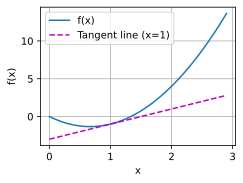

In [349]:
x = np.arange(0, 3, 0.1)
plot(x,[f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### **Gradient**



Suppose that $\mathbf{x} = [x_1,...,x_n]^T \in \mathbb{R}^{n}$, then the gradient of $f(\mathbf{x})$ for $\mathbf{x}$ is

\begin{equation}
  \nabla_{x}f(\mathbf{x}) = [\frac{∂ f(\mathbf{x})}{∂ x_{1}}, \frac{∂ f(\mathbf{x})}{∂ x_{2}}, ..., \frac{∂ f(\mathbf{x})}{∂ x_{n}} ]^{T}
\end{equation}

- For all $\mathbf{A} \in \mathbb{R}^{m \times n}$, $\nabla_{x} \mathbf{A}\mathbf{x} = \mathbf{A}^{T}$.

- For all $\mathbf{A} \in \mathbb{R}^{n \times m}$, $\nabla_{x} \mathbf{x}^{T} \mathbf{A} = \mathbf{A}$.

- For all $\mathbf{A} \in \mathbb{R}^{n \times n}$, $\nabla_{x} \mathbf{x}^{T} \mathbf{A} \mathbf{x} = (\mathbf{A}+\mathbf{A}^{T} ) \mathbf{x}$.

- $\nabla_{x} ||\mathbf{x}|| =  \nabla_{x} \mathbf{x}^{T} \mathbf{x} = 2\mathbf{x}$

- For all $\mathbf{X} \in \mathbb{R}^{m \times n}$, $\nabla_{X} ||\mathbf{X}||_{F} = 2\mathbf{X}$

### **Exer**

1. 绘制函数$y = f(x) = x^{3}- \frac{1}{x}$ 和其在$x=1$处切线的图像。

In [350]:
def f(x):
  return x**3 - 1/x

h = 0.1
for i in range(5):
  print( f'h = {h:.5f}, numerical limit = {numerical_lim(f, 1, h):.5f}' )
  h *= 0.1

h = 0.10000, numerical limit = 4.21909
h = 0.01000, numerical limit = 4.02020
h = 0.00100, numerical limit = 4.00200
h = 0.00010, numerical limit = 4.00020
h = 0.00001, numerical limit = 4.00002


<ipython-input-350-83ba00a5fff1>:2: RuntimeWarning: divide by zero encountered in true_divide
  return x**3 - 1/x


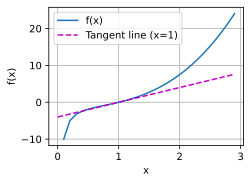

In [351]:
x = np.arange(0, 3, 0.1)
plot(x,[f(x), 4*x-4 ], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## **矩阵/张量计算**

### **基本计算**

In [352]:
# add
A = torch.arange(20, dtype = torch.float32).reshape(5, 4)
B = A.clone()
A, B, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [353]:
# Hadamard product
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [354]:
# Dot Product
x = torch.ones(4, dtype = torch.float32)
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([1., 1., 1., 1.]), tensor([1., 1., 1., 1.]), tensor(4.))

In [355]:
# Matrix-vector Product
A, x, torch.mv(A, x)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([1., 1., 1., 1.]),
 tensor([ 6., 22., 38., 54., 70.]))

In [356]:
A.shape, x.shape, torch.mv(A, x).shape

(torch.Size([5, 4]), torch.Size([4]), torch.Size([5]))

In [357]:
# Matrix-matrix multiplication
B = torch.ones(4,3)
A, B, torch.mm(A,B)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

#### **Norm**

向量范数$f: \mathbb{R}^n \mapsto \mathbb{R} $.

Properties:

- $f(\alpha \mathbf{x}) = |\alpha| f(\mathbf{x})$, where $\alpha$ is constant.
- (Triangle Inequality)
$f(\mathbf{x}+ \mathbf{y}) \leq f(\mathbf{x}) + f(\mathbf{y})$
- $f(\mathbf{x}) \geq 0$

In [358]:
# L_2 norm
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [359]:
# L_1 norm
torch.abs(u).sum()

tensor(7.)

In [360]:
# Frobenius Norm for Matrices
torch.norm(torch.ones(4,9))

tensor(6.)

### **回顾：向量和矩阵求导**

#### 标量对向量求导：$∂ y/ ∂ \mathbf{x}$

注意：若y是标量，x是列向量，y对x求导是*行向量*，结果是每个y对x的分量求导：

Let $\mathbf{x} = (x_1,...,x_n)^T$, $ y \in \mathbb{R}$.

$$
\frac{∂ y}{∂ \mathbf{x}} = [\frac{∂ y}{∂ x_1}, ..., \frac{∂ y}{∂ x_n}]
$$

#### 向量对向量求导：$∂ \mathbf{y}/ ∂ \mathbf{x}$

Let $\mathbf{x} = (x_1,...,x_n)^T$, $\mathbf{y} = (y_1,...,y_m)^T$.

$$
\frac{∂ \mathbf{y}}{∂ \mathbf{x}} =
\begin{bmatrix}
  \frac{∂y_1}{∂\mathbf{x}} \\
  \vdots \\
  \frac{∂y_m}{∂\mathbf{x}} \\
\end{bmatrix}
=
\begin{bmatrix}
  \frac{∂y_1}{∂x_1} & \cdots & \frac{∂y_1}{∂x_n}\\
  \vdots            &         & \vdots \\
   \frac{∂y_m}{∂x_1} & \cdots & \frac{∂y_m}{∂x_n} \\
\end{bmatrix}
$$


#### 向量/矩阵的链式求导

Let $y = f(u), u = g(x)$.

1.   y: scalar, u: scalar; $\mathbf{x} \in \mathbb{R}^{n}$: vector
$$
\frac{∂y}{∂\mathbf{x}} = \frac{∂y}{∂u} \cdot \frac{∂u}{∂\mathbf{x}}\\
(1,n); (1,1) (1,n)
$$

2.   y: scalar, $\mathbf{u} \in \mathbb{R}^{k}$: vector ; x: vector
$$
\frac{∂y}{∂\mathbf{x}} = \frac{∂y}{∂\mathbf{u}} \cdot \frac{∂\mathbf{u}}{∂\mathbf{x}}\\
(1,n); (1,k) (k,n)
$$

3.   $\mathbf{y} \in \mathbb{R}^{m}$: vector, $\mathbf{u}$: vector; $\mathbf{x}$: vector
$$
\frac{∂\mathbf{y}}{∂\mathbf{x}} = \frac{∂\mathbf{y}}{∂\mathbf{u}} \cdot \frac{∂\mathbf{u}}{∂\mathbf{x}}\\
(m,n); (m,k) (k,n)
$$



***E.g***.1,

$\quad$  $\mathbf{x}$, $\mathbf{w} \in \mathbb{R}^{n}$, $y \in \mathbb{R}$, $z = (<\mathbf{x}, \mathbf{w}> - y)^2$,

$\quad$ Compute $\frac{\partial z}{\partial \mathbf{w}}$.



**Sol.**

\begin{equation}
  \begin{aligned}
      \frac{\partial z}{\partial \mathbf{w}} &=  2(<\mathbf{x}, \mathbf{w}> - y) \frac{\partial <\mathbf{x}, \mathbf{w}>}{\partial \mathbf{w}} \\
      &= 2(<\mathbf{x}, \mathbf{w}> - y) \mathbf{x}^{T}
  \end{aligned}
\end{equation}

$\ast$ Determine $\frac{\partial <\mathbf{x}, \mathbf{w}>}{\partial \mathbf{w}} = \mathbf{x}^{T}$.

\begin{equation}
  \begin{aligned}
      \frac{\partial <\mathbf{x}, \mathbf{w}>}{\partial \mathbf{w}} &=  \frac{\partial \sum_{i=1}^{n} x_i w_i}{\partial \mathbf{w}} \\
      &= (x_1, ..., x_n).  (\text{标量对向量求导})
  \end{aligned}
\end{equation}


***E.g***.2,

$\quad$  $\mathbf{X} \in \mathbb{R}^{m \times n}$, $\mathbf{w} \in \mathbb{R}^{n}$, $\mathbf{y} \in \mathbb{R}^{m}$, $z = || \mathbf{X} \mathbf{w} - \mathbf{y}||^2$,

$\quad$ Compute $\frac{\partial z}{\partial \mathbf{w}}$.

**Sol.**

\begin{equation}
      \frac{\partial z}{\partial \mathbf{w}} =  2(\mathbf{X} \mathbf{w} - \mathbf{y})^T \mathbf{X}
\end{equation}

$\ast$ Set $\mathbf{v} \in \mathbb{R}^n$. Determine $\frac{∂||\mathbf{v}||^{2}}{ ∂ \mathbf{v}} = \mathbf{v}^T$.

\begin{equation}
  \begin{aligned}
      ||\mathbf{v}||^{2} &=  \sum_{i=1}^n v_{i}^2 \\
      \frac{∂||\mathbf{v}||^{2}}{ ∂ \mathbf{v}} &= (2v_1,...,2v_n) = 2\mathbf{v}^{T}
  \end{aligned}
\end{equation}

$\ast$ Determine $\frac{∂ (\mathbf{X} \mathbf{w}) }{ ∂ \mathbf{w}} = \mathbf{X}$, where $\mathbf{X} \in \mathbb{R}^{m \times n}$, $\mathbf{w} \in \mathbb{R}^{n}$.

\begin{equation}
      \mathbf{Xw} =
      \begin{bmatrix}
        \mathbf{x_1} \\
        \vdots \\
        \mathbf{x_m}
      \end{bmatrix}  \mathbf{w}
      =
      \begin{bmatrix}
        \mathbf{x_1}\mathbf{w} \\
        \vdots \\
        \mathbf{x_m}\mathbf{w}
      \end{bmatrix}  
      =
      \begin{bmatrix}
        \sum_{i=1}^n x_{1i}w_{i}\\
        \vdots \\
        \sum_{i=1}^n x_{mi}w_{i}
      \end{bmatrix}  
\end{equation}
where $\mathbf{x}_{j} \in \mathbb{R}^{1 \times n}$, $j \in [m]$.

$$
  \frac{∂ (\mathbf{X} \mathbf{w}) }{ ∂ \mathbf{w}}=
  \begin{bmatrix}
        x_{11} & x_{12} & ⋯ & x_{1n}\\
        \vdots & \vdots & ⋯ & \vdots\\
        x_{m1} & x_{m2} & ⋯ & x_{mn}
  \end{bmatrix} (标量对向量求导)
  = \mathbf{X}
$$

### **Pyhtorch自动求导**

深度学习框架通过自动计算导数，即自动微分（automatic differentiation）来加快求导。 实际中，根据设计好的模型，系统会构建一个计算图（computational graph）， 来跟踪计算是哪些数据通过哪些操作组合起来产生输出。 自动微分使系统能够随后反向传播梯度。 这里，反向传播（backpropagate）意味着跟踪整个计算图，填充关于每个参数的偏导数。

- 将代码分解成操作子，计算表示成一个无环图
- 显示构造（tensorflow/Theano/MXNet），流程大概是，A=a, B=b, c = f(a,b)，即分别定好要用的变量的值，然后代到定好的式子里面得到另一个变量的值。
- 隐式构造（PyTorch/MXNet），相当于求导之前要判断下是不是隐函数求导。

**自动求导的两种方法**：

For $\frac{∂y}{∂x}  = \frac{∂y}{∂u_{n}}  \frac{∂u_{n}}{∂u_{n-1}}...  \frac{∂u_{1}}{∂x}$

1.  正向积累$\frac{∂y}{∂x}  = \frac{∂y}{∂u_{n}} (\frac{∂u_{n}}{∂u_{n-1}} ... (\frac{∂u_{2}}{∂u_{1}} (\frac{∂u_{1}}{∂x})))$
2. 反向积累/ 反向传递$\frac{∂y}{∂x}  = (((\frac{∂y}{∂u_{n}})  \frac{∂u_{n}}{∂u_{n-1}})...)  \frac{∂u_{1}}{∂x}$

反向求导很符合我们平时求导的顺序，我觉得更像是一种递归。


我们现在看下**反向积累**：
下图中的正向指的是正着算值，反向是返回来求导来调整参数

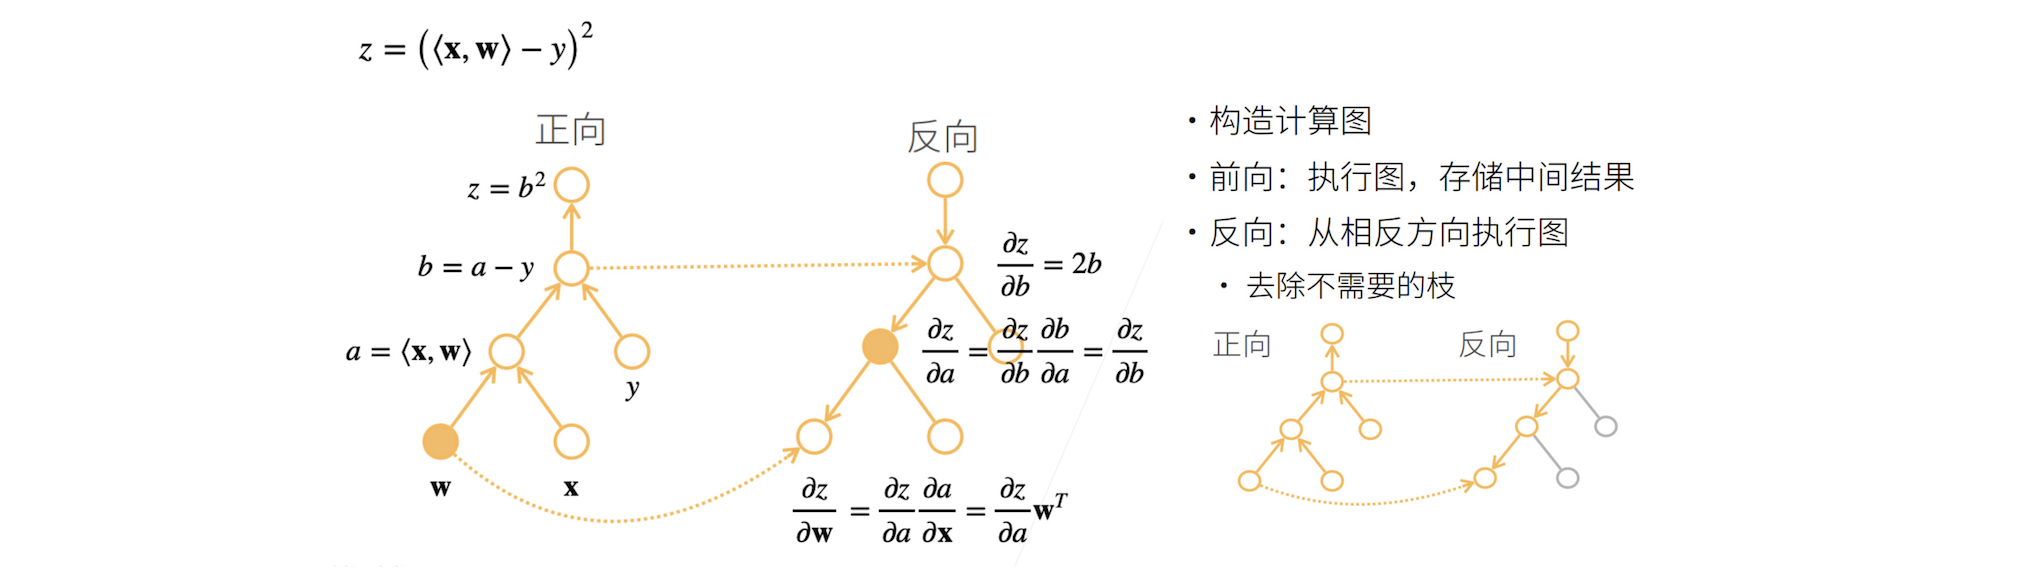

正向积累画成图就像二叉树后序遍历，不过二叉树是有向图。

**整个过程复杂度**：
- 正向：$T(n) = O(n)$; $S(n) = O(n)$
- 反向：$T(n) = O(n)$; $S(n) = O(1)$

其中$n$是操作子个数。

显然，向上走一遍和向下走一遍时间量级是没差别的，反向有些移出计算图的可以不用求导，即去除不必要的枝。但是向上计算结果麻烦在每一次求导都要扫一遍。

空间复杂度的话，正向求值需要把算好的结果存储起来然后再传给下一步，所以都得算。但是反向就不需要，直接求就好了。

相当于反向用时间去换空间。神经网络跑计算非常麻烦的一点在于内存空间不够。

E.g.1, Find the derivative of the function $y = 2 \mathbf{x}^T \mathbf{x}$ with respect to the column vector $\mathbf{x}$.

In [361]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

在我们计算$y$关于$\mathbf{x}$的梯度之前，需要一个地方来存储梯度(x.requires_grad_(True))

In [362]:
x.requires_grad_(True) # or x=torch.arange(4.0,requires_grad=True)
x.grad  # default = None

In [363]:
# Construct y = <x,x> = ||x||^2
y = 2 * torch.dot(x,x)
y #显式

tensor(28., grad_fn=<MulBackward0>)

In [364]:
# backward計算梯度（反向傳播正常操作）
y.backward()
x.grad # .grad不清空就會一直把新求的梯度cummulate上去

tensor([ 0.,  4.,  8., 12.])

In [365]:
x.grad == 4*x

tensor([True, True, True, True])

*Notes: pytorch里面下划线代表重写我的内容，如`zero_()`

In [366]:
from torch.autograd import grad
x.grad.zero_() #zero out清除之前的值
y = x.sum() #y = x_1+...+x_n
y.backward()
x.grad

tensor([1., 1., 1., 1.])

E.g.,2 当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

但当调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。 这里，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的偏导数之和。

后面会详细说明。

In [367]:
# y is a vector
x.grad.zero_()
y = x * x #element-wise product
y.sum().backward() #i.e., \nabla y_i之和
x.grad

tensor([0., 2., 4., 6.])

#### **分离计算**

有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

In [368]:
x.grad.zero_() # Remember to clear out gradients
y = x * x
u = y.detach() #把y当作一个常数，而不是关于x的函数，赋给u
z = u * x # i.e.，z = 常数*x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

#### **Python控制流的梯度计算**

In [369]:
def f(a):
  b = a * 2
  while b.norm() < 1000:
    b = b * 2
  if b.sum() >0:
    c = b
  else:
    c = 100 * b
  return c

a =  torch.randn(size = (), requires_grad = True)
d = f(a)
d.backward()

最开始$b$和$a$是线性关系，后面无论$c=?$，都是$b$乘以n个两倍以后判断得到的，所以无论怎么弄，最后都会得到$c=ka$，其中$k$是常数，所以求个导就是$d/a$。

我们可以验证一下：

In [370]:
a.grad == d/a

tensor(True)

#### **Exercise**

1. 为什么计算二阶导数比一阶导数的开销要更大？

因为
- 二阶导要存储一阶导占空间；
- 有时候二阶导要算的更多，比如$f(x_1,...,x_n)$的一阶导就是个向量，但是二阶导就是个Hessian矩阵，空间和时间都大。

2. 在运行反向传播函数之后，立即再次运行它，看看会发生什么。

In [371]:
x = torch.arange(3.0, requires_grad=True)
y = torch.dot(x,x)
y.backward()
x.grad

tensor([0., 2., 4.])

In [372]:
g = torch.dot(x,x)
g.backward()
x.grad

tensor([0., 4., 8.])

没有清零叠加的样子⬆️

3. 在控制流的例子中，我们计算d关于a的导数，如果将变量a更改为随机向量或矩阵，会发生什么？

In [373]:
# vector
a.grad.zero_()
a =  torch.randn(3, requires_grad = True)
d = f(a)
d.sum().backward()
a.grad

tensor([102400., 102400., 102400.])

*注意，要sum一下，不然求导会出错， `.backward()`输入要标量。

In [374]:
# Matrix
a.grad.zero_()
a =  torch.randn(size = (3,3), requires_grad = True)
d = f(a)
d.sum().backward()
a.grad

tensor([[512., 512., 512.],
        [512., 512., 512.],
        [512., 512., 512.]])

结论：backward得到的导数形状和a一样。

4. 使$f(x) = sin(x)$，绘制$f(x)$和 $df(x) / dx$ 的图像，其中后者不使用$f'(x) = cos(x)$。

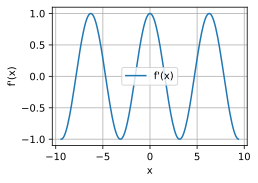

In [375]:
x = torch.arange(-3*torch.pi,3*torch.pi, 0.1)
x.requires_grad = True

def f(x):
  return torch.sin(x)

t = f(x)
t.sum().backward()

df = x.grad.detach().numpy() #画图前一定要把tensor格式改成numpy呀！
x = x.detach().numpy()

plot(x, df, 'x', 'f\'(x)', legend=['f\'(x)'])

## **Torch for Probability** (see d2l Ch2.6.1)

这个Section主要适应一下用torch package来做一些概率的计算。

E.g.，检查骰子是否有瑕疵，方法是多次投掷并记录结果。 对于每个骰子，我们将观察到{1, ..., 6}中的一个值。 对于每个值，一种自然的方法是将它出现的次数除以投掷的总次数， 即此事件（event）概率的估计值。

In [376]:
import torch
from torch.distributions import multinomial #multinomial is here!
from d2l import torch as d2l

In [377]:
fair_probs = torch.ones([6]) / 6      #1/6 array
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

***E.g.1,***

In [378]:
counts = multinomial.Multinomial(1000, fair_probs).sample()  #在索引处的值是采样结果中出现的次数。
# 我这里填了1000，说明投了1000次骰子。然后我们看看每个面被抽到多少次。
p_hat = counts/ 1000
p_hat

tensor([0.1780, 0.1510, 0.1720, 0.1630, 0.1620, 0.1740])

***E.g.2,*** Set 500 groups and sample 10 samples for each group.

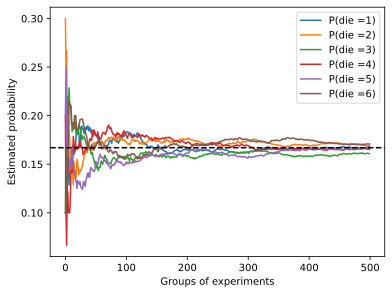

In [382]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,)) # counts.shape = [500,6]
cum_counts = counts.cumsum(dim=0) #cumsum()累加，1_1=x_1, i_2 = x_1 +x_2, ...
estimates = cum_counts / cum_counts.sum(dim=1, keepdims = True) #500*6

d2l.set_figsize((6, 4.5))
for i in range(6):
  d2l.plt.plot(estimates[:,i].numpy(),
               label = ("P(die =" + str(i+1) + ")") )
  # 用黑实线标出概率1/6的位置
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [380]:
# var startClickConnect = function startClickConnect(){
#     var clickConnect = function clickConnect(){
#         console.log("Connnect Clicked - Start");
#         document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
#         console.log("Connnect Clicked - End");
#     };

#     var intervalId = setInterval(clickConnect, 60000);

#     var stopClickConnectHandler = function stopClickConnect() {
#         console.log("Connnect Clicked Stopped - Start");
#         clearInterval(intervalId);
#         console.log("Connnect Clicked Stopped - End");
#     };

#     return stopClickConnectHandler;
# };

# var stopClickConnect = startClickConnect();

# stopClickConnect();